In [33]:
import sys
sys.path.insert(0, "../")

import math
from copy import deepcopy

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import io
import pandas as pd
import fiona
import shapely.geometry as geom
import geopandas as gpd

from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import Tiling
from weavingspace import tiling_utils

import shapely
shapely.__version__, np.__version__

('2.0.6', '1.26.4')

In [34]:
d = gpd.read_file("~/Documents/code/weaving-space/examples/data/imd-auckland-2018.gpkg")

In [37]:
w = TileUnit(tiling_type="cairo", spacing=2000, crs=d.crs)
tm = Tiling(w, d).get_tiled_map()

No variables specified, picked the first
            4 numeric ones available.


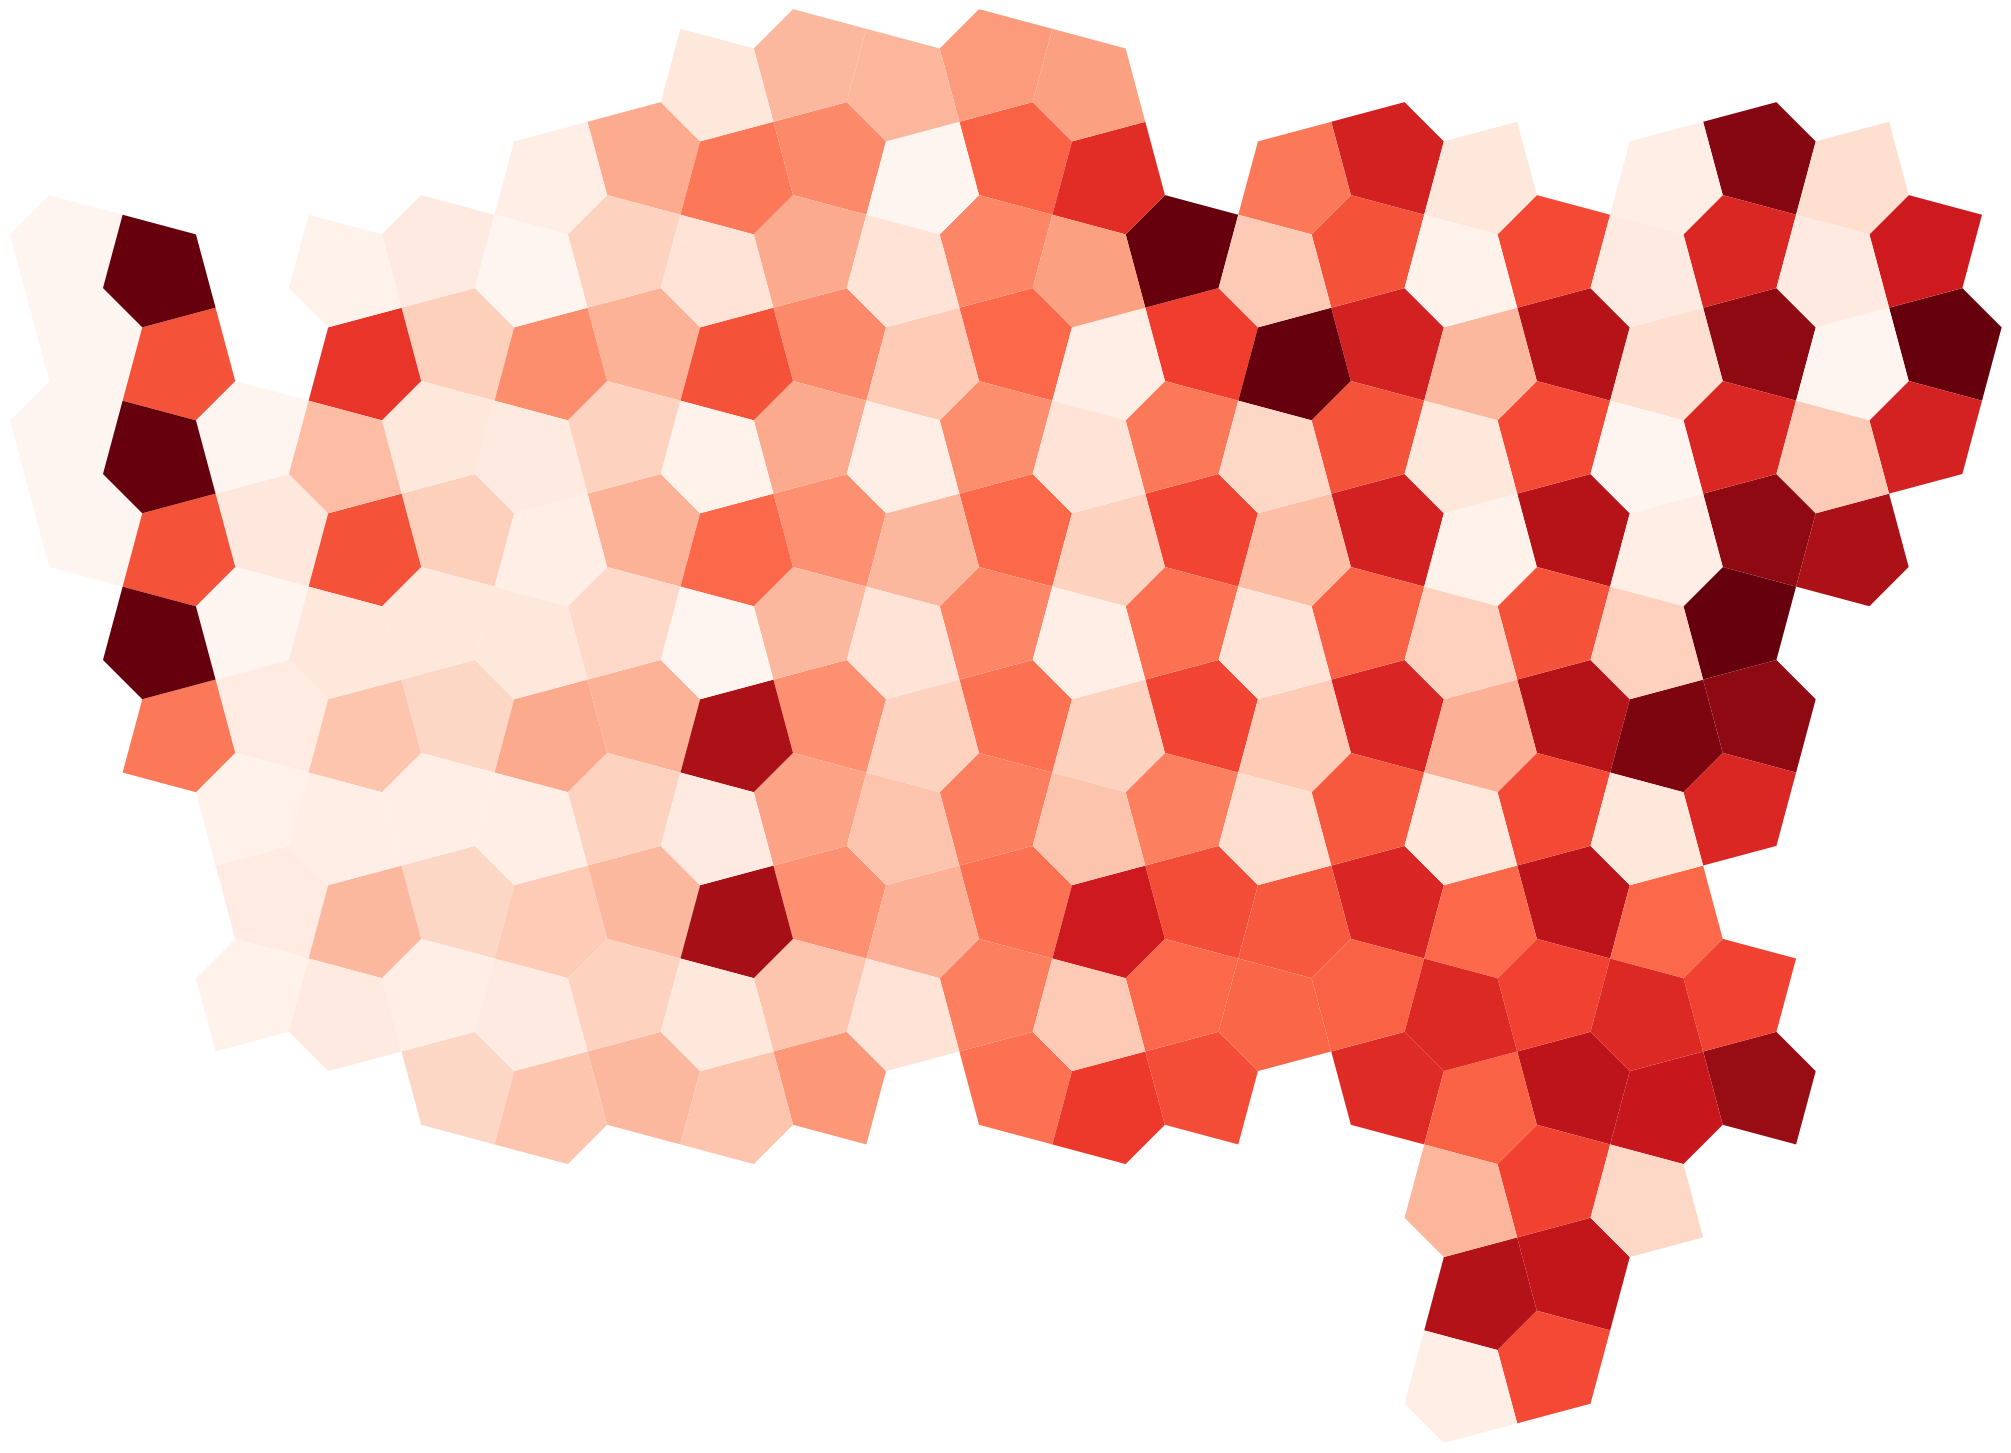

In [38]:
fig = tm.render(legend=False)

In [44]:
import mapclassify as mc

In [48]:
classifier = mc.classify(tm.map["Rank_IMD18"], scheme="EqualInterval", k=100)

In [ ]:
tm.map.Rank_IMD18

In [61]:
plt.colormaps.get_cmap("Reds")([x/10 for x in range(11)])
# classifier.find_bin(1200)[0]

array([[1.        , 0.96078431, 0.94117647, 1.        ],
       [0.99692426, 0.89619377, 0.84890427, 1.        ],
       [0.99137255, 0.79137255, 0.70823529, 1.        ],
       [0.98823529, 0.67154171, 0.56053825, 1.        ],
       [0.98745098, 0.54117647, 0.41568627, 1.        ],
       [0.98357555, 0.41279508, 0.28835063, 1.        ],
       [0.94666667, 0.26823529, 0.19607843, 1.        ],
       [0.85033449, 0.14686659, 0.13633218, 1.        ],
       [0.73647059, 0.08      , 0.10117647, 1.        ],
       [0.59461745, 0.0461361 , 0.07558631, 1.        ],
       [0.40392157, 0.        , 0.05098039, 1.        ]])

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [ ]:
# ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [ ]:
# tile = TileUnit(tiling_type="square-colouring", 
#                 code="3.3.4.3.4", 
#                 spacing=500, 
#                 n=8, 
#                 crs=ak.crs) \
#                   .inset_prototile(10).inset_tiles(0)
# tile.plot(r=1)


In [ ]:
# n = tile.tiles.shape[0]
# vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
# cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
#                                  "Purples", "Greys", "YlOrBr", "PuRd", 
#                                  "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
# tiling = Tiling(tile, ak)
# map = tiling.get_tiled_map()
# fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)